**PART 9 - DSIM project**

In this section, we test our algorithms of image retrieval 

**Authors:** 
* Francesca De Cola, matricola 819343  CdLM: Data Science
* Valentina Moretto, matricola 853744  CdLM: Data Science
* Valentina Zangirolami, matricola 819451  CdLM: Scienze Statistiche ed Economiche (CLAMSES)

**Load packages**

In [ ]:
import numpy as np
import os
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd
import random as rnd
import keras_vggface
import keras

from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras.models import Model, load_model
from tensorflow.keras.preprocessing import image as kimage

from sklearn.neighbors import KDTree, BallTree
import joblib

from shutil import copyfile
import tarfile

from matplotlib import pyplot as plt
from time import time

Using TensorFlow backend.
C:\Users\valen\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\valen\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\valen\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\valen\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

**Load dataset**

In [ ]:
data=np.load("C:/Users/valen/Desktop/magistrale/DSIM/dataset_imgs.npz")
img=data['X']

**Load vggface for feature extraction**

In [ ]:
net = VGGFace(include_top = False, input_shape = (224, 224, 3), pooling='max',model='senet50')

**Load model**

Refer to Image_Retrieval_8.ipynb we had save the second model tested for CBIR.

In [ ]:
tree= joblib.load('C:/Users/valen/Desktop/magistrale/DSIM/retrieval_model.joblib')

**Import query**

<function matplotlib.pyplot.show(*args, **kw)>

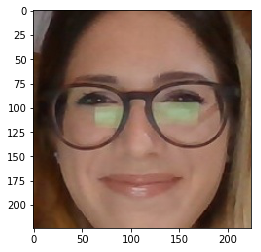

In [ ]:
img_query=kimage.load_img('C:/Users/valen/Desktop/magistrale/DSIM/test.jpg')
plt.imshow(img_query); plt.show

**Feature extraction**

In [ ]:
def fe_query(img):
    x=kimage.img_to_array(img)
    x=preprocess_input(x,version=2)
    x= np.expand_dims(x, axis=0)
    x= np.resize(x, [1, 224, 224, 3])
    model = Model(inputs = net.input, outputs = net.get_layer('global_average_pooling2d_15').output)
    x=model.predict(x)
    return x
img_query= fe_query(img_query)

**Search query**

In [ ]:
dist, ind = tree.query(img_query, k=10)
dist

array([[0.59788112, 0.90610436, 1.05617213, 1.18518035, 1.26774484,
        1.2784642 , 1.35814827, 1.38848817, 1.38861672, 1.39091915]])

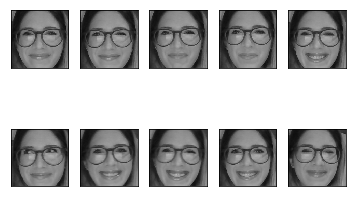

In [ ]:
j=0
for i in ind[0]:
    ax = plt.subplot(2, 5, j + 1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    j+=1
    plt.imshow(img[i][:,:,::-1])